In [1]:
print("Lecture-12")

Lecture-12


## Katman Nöronlarında Kullanılan Aktivasyon Fonksiyonları (Devamı)

Lojistik olmayan regresyon problemleri için çıktı katmanlarında en çok tercih edilen aktivasyon fonksiyonu "linear" fonksiyonudur. Bu aktivasyon fonksiyonu girdiyi değiştirmeden çıktıya vermektedir. 

linear(x) = x

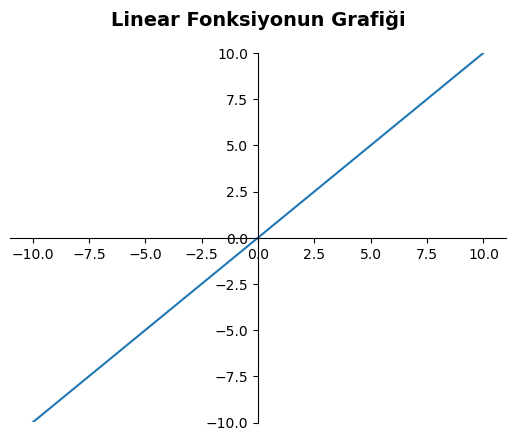

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = x

plt.title("Linear Fonksiyonun Grafiği", fontsize=14, pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim(-10, 10)
plt.plot(x, y)
plt.show()

Softmax fonksiyonu çok sınıflı sınıflandırma problemlerinde çıktı katmanlarında kullanılmaktadır. Softmax fonksiyonu tek bir çıktıyı değil bir grup çıktıyı alarak işlem yapmaktadır. 

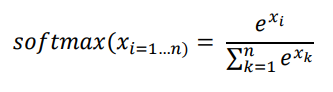

softmax fonksiyonuna biz n tane x değeri veririz. Fonksiyon da bize n tane çıktı değeri verir. Fonksiyonun verdiği çıktıların payında onun üstel fonksiyon değeri, paydasında da tüm çıktıların üstel fonksiyona sokulmuş toplam değeri olduğunu görürüz. Bu durumda fonksiyonun bize verdiği çıktı dğeerlerinin toplamı 1 olacaktır.

n tane girdi değerini toplamları 1 olan n tane çıktı değerine dönüştürüyor. Fonksiyonun çıktıları [0, 1] aralığında olacaktır.

Örneğin bir resmin "elma, armut, kayısı, üzüm, kiraz" resimlerinni hangisine ilişkin olduğunu bulan bir yapay sinir ağı modeli tasarlayacak olalım. Bu modelin beş tane çıktısı olacaktır ve bu beş çıktının toplamı 1 olacaktır. 

model.add(Dense(5, activation='softmax', name='Output'))

elma + armut + kayısı + üzüm + kiraz = 1

Pekiyi çok sınıflı sınıflandırmada tahmin işlemi nasıl yapılmaktadır? Sınıflandırmada hangi çıktı nöronu diğerlerinden yüksek değere sahipse o sınıf seçilecek biçimde yapılmaktadır.

elma -> 0.2
armut -> 0.15
kayısı -> 0.4
üzüm -> 0.10
kiraz -> 0.15

Bu durumda en yüksek çıktı değerine sahip olan "kayısı" olduğu için ağın söz konusu olan resmi "kayısı" olarak tahmin ettiğini kabul ederiz. Softmax fonksiyonuda da çıktı nöronlarının değerlerinin birer olasılık belirttiğini görüyoruz.

## Yapay Sinir Ağı Modellerinde Kullanılan Loss Fonksiyonları

n -> batch içerisindeki satır sayısı,
Yi --> batch içerisindeki i'inci satırın gerçek değeri
Yî --> batch içersiindeki i'inci satırın ağdan tahmin edilen değeri

#### Mean Squared Error (MSE):
Bu loss fonksiyonu lojistik olmayan regresyon modelleri için en fazla tercih edilen loss fonksiyonudur. Bu fonksiyonda olması gereken değerlerle ağdan elde edilen değerler arasındaki farkların karelerinni ortalamasını hesaplamaktadır. Bu fark ne kadar küçükse olması gereken değerlerle ağın verdiği değerler o akdar birbirine yaklaşmış olur.

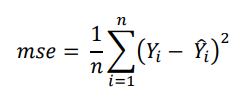

#### Mean Absolute Error (MAE):
Lojistik olmayan regresyon modellerinde kullaınlmaktadır. Ana fikir MSE ile aynıdır. Yalnızca kare yerine mutlak değer işlemi uygulanmaktadır.

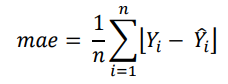

#### Mean Absolute Percentage Error (MAPE):
Lojistik olmayan regresyon modellerinde kullanılmaktadır.

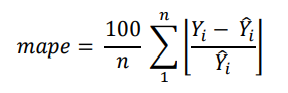

#### Mean Squared Logarithmic Error:
Lojistik olmayan regresyon modellerinde kullanılmaktadır. Fonksiyonda gerçek değerlerle kestirilen değerlerin logaritmik farklarınnı karelerinin ortalaması hesaplanmaktadır.

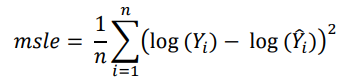

#### Binary Cross-Entropy:
İki sınıflı sınıflandırma modellerinde en çok tercih edilen loss fonksiyonudur. 

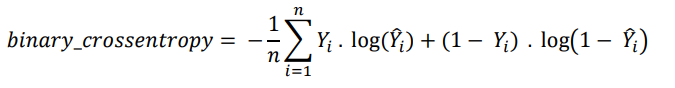

#### Categorical Cross-Entropy:

İkiden fazla sınıflı sınıflandırma problemlerinde en çok tercih edilen loss fonksiyonudur. Örneğin bir resmin üzerinde yazan rakamın belirlenmesine yönelik bir model çok sınıflı bir sınıflandırma problemidir. 

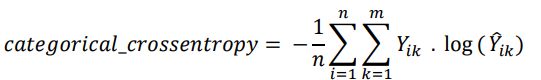



## YSA Kullanılan Metrik Fonksiyonlar

Metrik fonksiyonlar epoch sonrasında eğitimin gidişatı hakkında bilgi edinmek için kullanılan fonksiyonlardı.

#### Binary Accuracy
binary_accuracy. İkili sınıflandırma problemlerinde ağın verdiği değerin yüzde kaçının gerçek değerle aynı olduğu hesabını yapmaktadır. 1000 veri -> 800 --> binary accuracy: 800 / 1000 --> 0.8. 

#### Binary Crossentropy
loss fnoskyonun metric biçimi.

#### Categorical Accuracy
Bu fonksiyon da kestirilen değer ile gerçek değer arasında benzeşmenin oranını vermektdeir. İkiden fazla sınıflı lojistik regresyon modellerinde kullanılmaktadır. Örneğin softmax çıktılarının en büyüğüne ilişkin sınıf ile gerçek değere ilişkin snıf aynı mı diye bakılarak bir yüzde değeri hesaplanmaktadır.

İki sınıflı bir problemdeki %50 başarıyla 10 sınıflı bir problemdeki %50 başarıyı karşılaştırırsak ne söyleyebiliriz? İki sınıflı problemdeki %50 başarı rastgele seçimden daha iyi bir seçim değildir. 

mse, mae, mape bu fonksiyonlarda metrik fonksiyonlar olarak kullanabiliriz.



#### __ÖDEV: Bir keras modelindeki nöronların ağırlık değerleri ('w' ve 'bias' değerlerinin) nasıl elde edilebilir? Ve bunlar ağa nasıl yüklenebilir?__

#### Keras Modelinin Özet Bilgisinin Yorumlanması

In [3]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

dataset_x = df.iloc[:, :-1].to_numpy()
dataset_y = df.iloc[:, -1].to_numpy()

from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, random_state=1234)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='Sample')
model.add(Dense(64, activation='relu', input_dim=dataset_x.shape[1], name = 'Hidden-1'))
model.add(Dense(64, activation='relu', name = 'Hidden-2'))
model.add(Dense(1,  activation='sigmoid', name = 'Output'))

model.summary()

Model: "Sample"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                576       
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


Son sütunda her katmandki tahmin edilecek parametre sayılarını görmekteyiz. Tahmin edilecek parametrelerin sayısı şöyle hesaplanır:

- Birinci katmana 8 nöron girmiştir. Bu katmanda 64 nöron vardr ve her nöronun da bir "bias" değeri bulunmaktadır. Bu durumda bu katman için tahmin edilecek parametrelerin sayısı -> 8 * 64 (w) + 64 (bias) = 576
- İkinci katmana 64 nöron girmiştir. Bu katmanda 64 nöron vardır ve höronun da bir "bias" değeri bulunmaktadır. Bu durumda bu katman için tahmin edilecek parametrelerin sayısı -> 64 * 64 + 64 = 4160
- Çıktı katmanına 64 nöron girmiştir ve bu katmanda tek bir nöron vardır. 64 * 1 + 1 = 65

#### __ÖDEV: Oluşturulan Modelin ve Modeldeki tüm ağırlık değerleri bir dosyada nasıl saklanır ve bu dosyadan bu ağırlık değerleri nasıl geri yüklenir?__

Ekstra: Bu modeli keras-model-save.py adında bir dosyaya kodlarını yaz. Sonrasında bu kodlarla oluşturulan modeli özel bir dosyaya kaydet. Sonra keras-model-load.py adında bir python dosyasında da tahmin işlemini gerçekleştir.  

### Keras Modelinde Callback Mekanizması

Programlamada bir kütüphane ya da Framework'ün belli durumlarda programcının belirlediği bir fonksiyonu çağırması durumuna "callback mekanizması", çağrılan fonksiyona da "callback fonksiyonu" denilmektedir. Bu mekanizma sayesinde fit, evaluate, predict metotları işlemlerini yaparken programcnın belirlediği kodları çalıştırılabilmektedir. callbacks parametreye sahipler. Bazı callback sınıflar zaten hazır bir biçimde kütüphanede bulunmaktadır. 

tensorflow.keras.callbacks modülündeki Callback isimli sınıfla.

History isimli callback sınıf kayıt işlemi yapmaktadır. History ile fit metodunnu bizim için birtakım kayıtların tutmasını sağlayabiliriz.

hist = model.fit(training_dataset_x, training_dataset_y, batch_size=30, epochs=100, callbacks=History)

In [4]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

dataset_x = df.iloc[:, :-1].to_numpy()
dataset_y = df.iloc[:, -1].to_numpy()

from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='Diabetes')
model.add(Dense(64, activation='relu', input_dim=dataset_x.shape[1], name = 'Hidden-1'))
model.add(Dense(64, activation='relu', name = 'Hidden-2'))
model.add(Dense(1,  activation='sigmoid', name = 'Output'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2)

Model: "Diabetes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                576       
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 4s 40ms/step - loss: 2.2044 - binary_accuracy: 0.5761 - val_loss: 1.0317 - val_binary_accuracy: 0.6034
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 1.1410 - binary_accuracy: 0.6348 - val_loss: 0.7840 - val_binary_accuracy: 0.6034
Epoch 3/1

In [5]:
hist

In [6]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

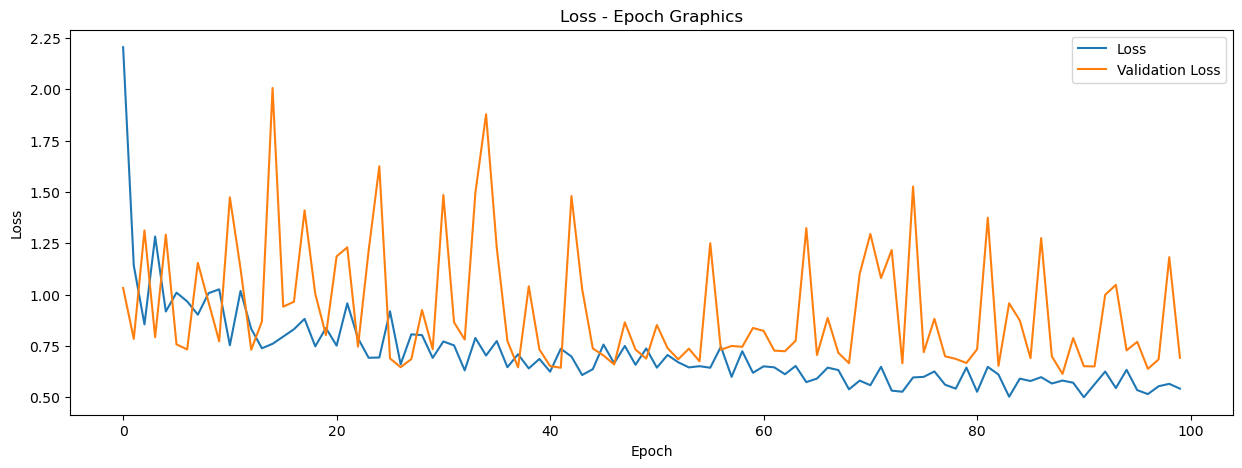

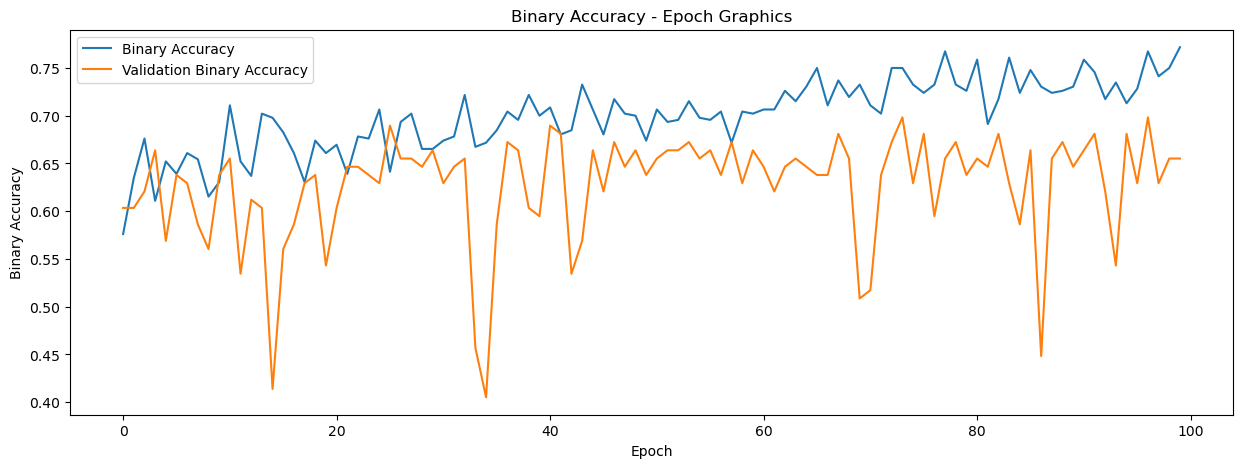

In [8]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [9]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=1000, validation_split=0.2)

Epoch 1/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.5222 - binary_accuracy: 0.7435 - val_loss: 0.9084 - val_binary_accuracy: 0.5948
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5825 - binary_accuracy: 0.7478 - val_loss: 0.6825 - val_binary_accuracy: 0.6207
Epoch 3/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5213 - binary_accuracy: 0.7674 - val_loss: 1.0773 - val_binary_accuracy: 0.6552
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5313 - binary_accuracy: 0.7522 - val_loss: 0.7034 - val_binary_accuracy: 0.6638
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4970 - binary_accuracy: 0.7478 - val_loss: 0.7468 - val_binary_accuracy: 0.6121
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5006 - binary_accuracy: 0.7522 - val_loss: 0.7195 - val_binary_accuracy: 0.6466
Epoch 7/1000
15/15 [==============================] - 0s 5ms/st

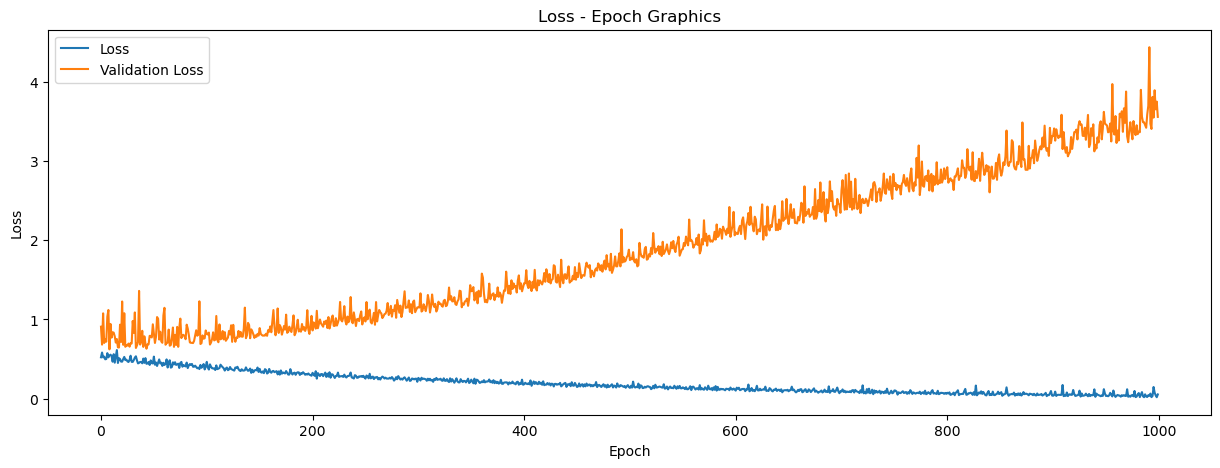

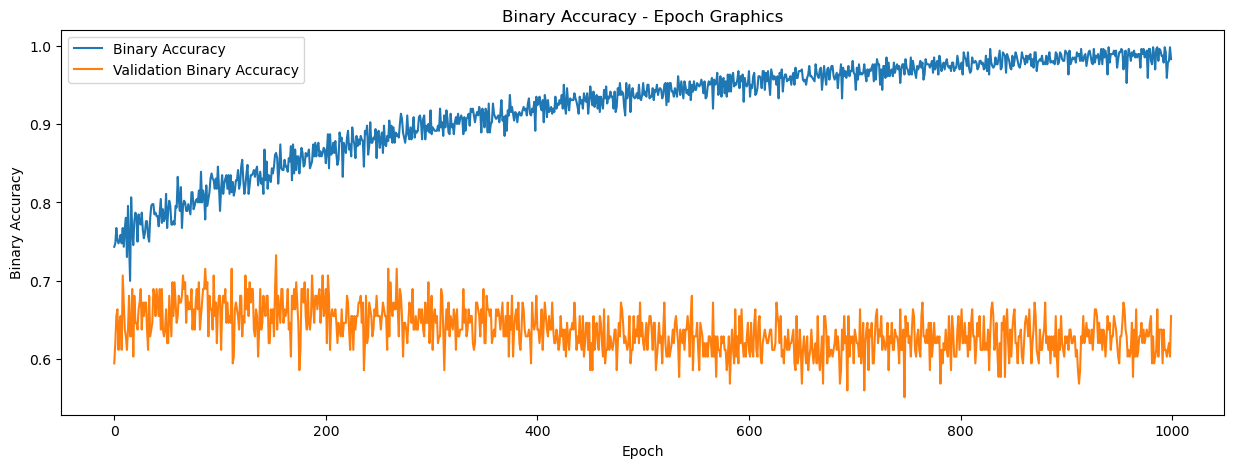

In [10]:
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

CSVLogger isimli callback sınıfı tıpkı history sınıfı gibi epoch temelinde kayıt yapmaktadır. Fark olarak bu kayıtları bir CSV dosyasına yazar. 

In [11]:
from tensorflow.keras.callbacks import CSVLogger

csv_callback = CSVLogger('diabetes-new.csv')
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[csv_callback])

Epoch 1/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0296 - binary_accuracy: 0.9848 - val_loss: 3.7469 - val_binary_accuracy: 0.6121
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0247 - binary_accuracy: 0.9935 - val_loss: 3.6883 - val_binary_accuracy: 0.5948
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0427 - binary_accuracy: 0.9891 - val_loss: 3.6212 - val_binary_accuracy: 0.5776
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0233 - binary_accuracy: 0.9957 - val_loss: 3.5807 - val_binary_accuracy: 0.6121
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0431 - binary_accuracy: 0.9848 - val_loss: 3.4783 - val_binary_accuracy: 0.6293
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0562 - binary_accuracy: 0.9739 - val_loss: 3.7364 - val_binary_accuracy: 0.5948
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - l

Diğer çok kullanılan hazır callback sınıflarından biri de LambdaCallback isimli sınıftır. Bizden aldığı fonksiyonları bazı olaylar gerçekleştiğinde çağırmaktadır.

tf.keras.callbacks.LambdaCallback(
 on_epoch_begin=None,
 on_epoch_end=None, 
 on_batch_begin=None,
 on_batch_end=None,
 on_train_begin=None,
 on_train_end=None,
 **kwargs
) 


In [14]:
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
    def on_epoch_begin(self, epoch, logs):
        print('epoch {} begins...'.format(epoch))
    
    def on_epoch_end(self, epoch, logs):
        print('\n epoch {} ends...'.format(epoch))

my_callback = MyCallback()
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=10, validation_split=0.2, callbacks=[my_callback])
eval_result = model.evaluate(test_dataset_x, test_dataset_y)

epoch 0 begins...
Epoch 1/10
 1/15 [=>............................] - ETA: 0s - loss: 0.0120 - binary_accuracy: 1.0000
 epoch 0 ends...
15/15 [==============================] - 0s 12ms/step - loss: 0.0377 - binary_accuracy: 0.9891 - val_loss: 3.5559 - val_binary_accuracy: 0.6466
epoch 1 begins...
Epoch 2/10
 1/15 [=>............................] - ETA: 0s - loss: 0.0206 - binary_accuracy: 1.0000
 epoch 1 ends...
15/15 [==============================] - 0s 5ms/step - loss: 0.0159 - binary_accuracy: 0.9978 - val_loss: 3.8642 - val_binary_accuracy: 0.6121
epoch 2 begins...
Epoch 3/10
 1/15 [=>............................] - ETA: 0s - loss: 0.0406 - binary_accuracy: 1.0000
 epoch 2 ends...
15/15 [==============================] - 0s 5ms/step - loss: 0.0305 - binary_accuracy: 0.9913 - val_loss: 3.8647 - val_binary_accuracy: 0.6379
epoch 3 begins...
Epoch 4/10
 1/15 [=>............................] - ETA: 0s - loss: 0.0162 - binary_accuracy: 1.0000
 epoch 3 ends...
15/15 [===================

__ÖDEV: Diğer callback sınıflarını inceleyelim.__